In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [2]:
filtered_data=pd.read_csv("C:/Users/user/Documents/MLC_filtered_com_major_final/filtered_com_major_final.csv")
filtered_data

,Unnamed: 0,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude,Olongitude,Dlatitude,Dlongitude
0,0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.17700,50.0333,8.57056
1,1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00,40.4719,-3.56264,40.4719,-3.56264
2,2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.17700,49.0097,2.54778
3,3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00,55.9728,37.41470,50.0333,8.57056
4,4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00,40.6174,-74.24460,49.0097,2.54778
...,...,...,...,...,...,...,...,...,...,...,...,...
24187788,24187788,JZA5,DH8D,CYOW,CYUL,2022-12-31 23:28:14+00:00,2022-12-31 23:53:59+00:00,2022-12-31 00:00:00+00:00,45.3225,-75.66920,45.4657,-73.74550
24187789,24187789,PDT6131,E145,KMDT,KPHL,2022-12-31 23:29:15+00:00,2022-12-31 23:50:46+00:00,2022-12-31 00:00:00+00:00,40.1935,-76.76340,39.8719,-75.24110
24187790,24187790,JZA319,DH8D,CYQQ,CYVR,2022-12-31 23:30:43+00:00,2022-12-31 23:51:42+00:00,2022-12-31 00:00:00+00:00,49.7108,-124.88700,49.1939,-123.18400
24187791,24187791,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31 00:00:00+00:00,41.9786,-87.90470,40.0392,-88.27810


In [3]:
filtered_data.drop('Unnamed: 0', axis=1, inplace=True)
filtered_data.head()

,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude,Olongitude,Dlatitude,Dlongitude
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.17700,50.0333,8.57056
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00,40.4719,-3.56264,40.4719,-3.56264
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.17700,49.0097,2.54778
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00,55.9728,37.41470,50.0333,8.57056
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00,40.6174,-74.24460,49.0097,2.54778


In [4]:
filtered_data['DOW'] = pd.DatetimeIndex(filtered_data.day).weekday

In [5]:
#get day from beginning of the year, hour and day of the week from datetime
filtered_data['Hour']=pd.DatetimeIndex(filtered_data.day).hour

In [6]:
# Rename 'day' column to 'departure_date'
filtered_data = filtered_data.rename(columns={'day': 'Departure_date'})

In [7]:
#get the departure date
filtered_data['Departure_date'] = pd.to_datetime(filtered_data['firstseen']).dt.date
filtered_data.head()

,callsign,typecode,origin,destination,firstseen,lastseen,Departure_date,Olatitude,Olongitude,Dlatitude,Dlongitude,DOW,Hour
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2018-12-31,-33.9461,151.17700,50.0333,8.57056,1,0
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2018-12-31,40.4719,-3.56264,40.4719,-3.56264,1,0
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2018-12-31,-33.9461,151.17700,49.0097,2.54778,1,0
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2018-12-31,55.9728,37.41470,50.0333,8.57056,1,0
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2018-12-31,40.6174,-74.24460,49.0097,2.54778,1,0


In [8]:
filtered_data['flight_count'] = 1
filtered_data.head()

,callsign,typecode,origin,destination,firstseen,lastseen,Departure_date,Olatitude,Olongitude,Dlatitude,Dlongitude,DOW,Hour,flight_count
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2018-12-31,-33.9461,151.17700,50.0333,8.57056,1,0,1
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2018-12-31,40.4719,-3.56264,40.4719,-3.56264,1,0,1
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2018-12-31,-33.9461,151.17700,49.0097,2.54778,1,0,1
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2018-12-31,55.9728,37.41470,50.0333,8.57056,1,0,1
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2018-12-31,40.6174,-74.24460,49.0097,2.54778,1,0,1


In [9]:
unique_typecodes = filtered_data['typecode'].unique()
unique_typecodes

array(['A332', 'B788', 'B744', 'B77W', 'B789', 'A359', 'A388', 'B772',
       'B77L', 'B763', 'A333', 'B739', 'A320', 'B748', 'B738', 'A310',
       'A343', 'A346', 'B737', 'A321', 'A319', 'B752', 'B764', 'B773',
       'B753', 'B736', 'B734', 'E190', 'CRJ7', 'E170', 'CRJ2', 'CRJ9',
       'E145', 'B712', 'DH8D', 'CRJ1', 'DH8C', 'BCS1', 'B733', 'E140',
       'A306', 'E120', 'B762', 'BCS3', 'B735', 'CRJX', 'E195', 'A318',
       'CRJ-1000', 'E135', 'B783', 'A3ST', 'DHC6', 'A342', 'A35K', 'DH8B',
       'A30B', 'B732', 'A330', 'B77F', 'A339', 'DH8A', 'B78X', 'A345',
       'B722', 'B74S', 'B742', 'DHC2', 'E110', 'A330-200', 'DHC3', 'B728',
       'A39P', 'E175', 'A32N', 'B777F', 'A321-231 ', 'B777', 'A320-251N',
       'A320-200', 'A319-111', 'B767', 'A320-214', 'B721', 'A340', 'B703',
       'DHC8', 'A338', 'A337', 'DH2T', 'DHC7', 'DHT', 'A380', 'B724',
       'B743', 'A321-211 ', 'A320-214 ', 'A350'], dtype=object)

In [10]:
# Modify the lambda function for the new conditions
filtered_data['type'] = filtered_data['typecode'].apply(
    lambda x: 'A320' if x == 'A320' else (
        'A321' if x == 'A321' else (
            x[:3] if x[0] in ('A', 'B') else x
        )
    )
)

# Display the head of the DataFrame to check the new 'type' column
filtered_data.head()

,callsign,typecode,origin,destination,firstseen,lastseen,Departure_date,Olatitude,Olongitude,Dlatitude,Dlongitude,DOW,Hour,flight_count,type
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2018-12-31,-33.9461,151.17700,50.0333,8.57056,1,0,1,A33
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2018-12-31,40.4719,-3.56264,40.4719,-3.56264,1,0,1,A33
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2018-12-31,-33.9461,151.17700,49.0097,2.54778,1,0,1,B78
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2018-12-31,55.9728,37.41470,50.0333,8.57056,1,0,1,B74
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2018-12-31,40.6174,-74.24460,49.0097,2.54778,1,0,1,B78


In [11]:
unique_type = filtered_data['type'].unique()
unique_type

array(['A33', 'B78', 'B74', 'B77', 'A35', 'A38', 'B76', 'B73', 'A320',
       'A31', 'A34', 'A321', 'B75', 'E190', 'CRJ7', 'E170', 'CRJ2',
       'CRJ9', 'E145', 'B71', 'DH8D', 'CRJ1', 'DH8C', 'BCS', 'E140',
       'A30', 'E120', 'CRJX', 'E195', 'CRJ-1000', 'E135', 'A3S', 'DHC6',
       'DH8B', 'DH8A', 'B72', 'DHC2', 'E110', 'DHC3', 'A39', 'E175',
       'A32', 'B70', 'DHC8', 'DH2T', 'DHC7', 'DHT'], dtype=object)

In [12]:
wide=['A34',
 'A35',
 'A38',
 'B77',
'B74','A39']
mid=['A33',
     'B75',
     'B76',
     'B78']
narrow = ['A30',
 'A31',
 'A32',
 'A320',
 'A321',
 'B70',
 'B71',
 'B72',
 'B73',
 'BCS',
 'CRJ-1000',
 'CRJ1',
 'CRJ2',
 'CRJ7',
 'CRJ9',
 'CRJX',
 'DH2T',
 'DH8A',
 'DH8B',
 'DH8C',
 'DH8D',
 'DHC2',
 'DHC3',
 'DHC6',
 'DHC7',
 'DHC8',
 'DHT',
 'E110',
 'E120',
 'E135',
 'E140',
 'E145',
 'E170',
 'E175',
 'E190',
 'E195']

In [13]:
# Function to categorize type into 'size'
def categorize_size(type):
    if type in wide:
        return 'wide'
    elif type in mid:
        return 'mid'
    elif type in narrow:
        return 'narrow'
    else:
        return 'unknown'

# Apply the function to create the new column
filtered_data['size'] = filtered_data['type'].apply(categorize_size)

# Filter out rows where 'size' is 'unknown'
filtered_data = filtered_data[filtered_data['size'] != 'unknown']

# Display the first 20 rows of the filtered data
filtered_data.head(20)

,callsign,typecode,origin,destination,firstseen,lastseen,Departure_date,Olatitude,Olongitude,Dlatitude,Dlongitude,DOW,Hour,flight_count,type,size
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2018-12-31,-33.94610,151.17700,50.0333,8.570560,1,0,1,A33,mid
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2018-12-31,40.47190,-3.56264,40.4719,-3.562640,1,0,1,A33,mid
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2018-12-31,-33.94610,151.17700,49.0097,2.547780,1,0,1,B78,mid
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2018-12-31,55.97280,37.41470,50.0333,8.570560,1,0,1,B74,wide
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2018-12-31,40.61740,-74.24460,49.0097,2.547780,1,0,1,B78,mid
5,SVA872,B77W,WIII,RPLL,2018-12-31 04:00:49+00:00,2019-01-01 05:54:59+00:00,2018-12-31,-6.12556,106.65600,14.5086,121.020000,1,0,1,B77,wide
6,LAN600,B788,SKBO,KLAX,2018-12-31 04:21:52+00:00,2019-01-01 01:51:44+00:00,2018-12-31,4.70159,-74.14690,33.9425,-118.408000,1,0,1,B78,mid
7,HVN55,B789,YSSY,EGLL,2018-12-31 04:37:28+00:00,2019-01-01 06:44:42+00:00,2018-12-31,-33.94610,151.17700,51.4775,-0.461389,1,0,1,B78,mid
8,CPA343,A359,YMML,EGKK,2018-12-31 04:51:50+00:00,2019-01-01 05:00:27+00:00,2018-12-31,-37.67330,144.84300,51.1481,-0.190278,1,0,1,A35,wide
9,AAL126P,B77W,KLAX,KDFW,2018-12-31 04:58:34+00:00,2019-01-01 12:40:21+00:00,2018-12-31,33.94250,-118.40800,32.8968,-97.038000,1,0,1,B77,wide


In [14]:
# Convert string to datetime.date object
from datetime import datetime
BeforeCovid_date = datetime.strptime('2020-01-01', '%Y-%m-%d').date()
AfterCovid_date = datetime.strptime('2021-01-01', '%Y-%m-%d').date()

In [15]:
BeforeCovid = filtered_data[filtered_data['Departure_date'] < BeforeCovid_date]
BeforeCovid.tail()

,callsign,typecode,origin,destination,firstseen,lastseen,Departure_date,Olatitude,Olongitude,Dlatitude,Dlongitude,DOW,Hour,flight_count,type,size
7369709,AAL891,A321,KPHX,KORD,2019-12-31 23:59:19+00:00,2020-01-01 02:54:58+00:00,2019-12-31,33.4343,-112.0120,41.9786,-87.9047,2,0,1,A321,narrow
7369710,SWA4266,B737,KMDW,KDTW,2019-12-31 23:59:19+00:00,2020-01-01 00:38:09+00:00,2019-12-31,41.7861,-87.7525,42.2125,-83.3533,2,0,1,B73,narrow
7369711,EDV4759,CRJ9,KBOS,KJFK,2019-12-31 23:59:33+00:00,2020-01-01 00:44:57+00:00,2019-12-31,42.3643,-71.0052,40.6397,-73.7789,2,0,1,CRJ9,narrow
7369712,JBU7,A320,KFLL,KLAS,2019-12-31 23:59:37+00:00,2020-01-01 04:59:27+00:00,2019-12-31,26.0726,-80.1527,36.0801,-115.1520,2,0,1,A320,narrow
7369713,UAL790,B738,KORD,KBOS,2019-12-31 23:59:45+00:00,2020-01-01 01:45:50+00:00,2019-12-31,41.9786,-87.9047,42.3643,-71.0052,2,0,1,B73,narrow


In [16]:
CovidData = filtered_data[
    (filtered_data['Departure_date'] >= BeforeCovid_date) &
    (filtered_data['Departure_date'] < AfterCovid_date)
]
CovidData.tail()

,callsign,typecode,origin,destination,firstseen,lastseen,Departure_date,Olatitude,Olongitude,Dlatitude,Dlongitude,DOW,Hour,flight_count,type,size
11954301,ASA1286,B739,KPDX,KLAS,2020-12-31 23:59:20+00:00,2021-01-01 01:32:56+00:00,2020-12-31,45.5887,-122.5980,36.0801,-115.1520,4,0,1,B73,narrow
11954302,UAL709,B738,KPHX,KDEN,2020-12-31 23:59:22+00:00,2021-01-01 01:21:22+00:00,2020-12-31,33.4343,-112.0120,39.8617,-104.6730,4,0,1,B73,narrow
11954303,AAL2477,A321,KCLT,KBWI,2020-12-31 23:59:29+00:00,2021-01-01 00:51:21+00:00,2020-12-31,35.2140,-80.9431,39.1753,-76.6683,4,0,1,A321,narrow
11954304,DAL1494,A320,KATL,KSTL,2020-12-31 23:59:45+00:00,2021-01-01 01:18:02+00:00,2020-12-31,33.6367,-84.4281,38.7487,-90.3700,4,0,1,A320,narrow
11954305,SWA4161,B738,KBUR,KOAK,2020-12-31 23:59:47+00:00,2021-01-01 00:56:45+00:00,2020-12-31,34.2007,-118.3590,37.7213,-122.2210,4,0,1,B73,narrow


In [17]:
AfterCovid = filtered_data[filtered_data['Departure_date'] >= AfterCovid_date]
AfterCovid.tail()

,callsign,typecode,origin,destination,firstseen,lastseen,Departure_date,Olatitude,Olongitude,Dlatitude,Dlongitude,DOW,Hour,flight_count,type,size
24187788,JZA5,DH8D,CYOW,CYUL,2022-12-31 23:28:14+00:00,2022-12-31 23:53:59+00:00,2022-12-31,45.3225,-75.6692,45.4657,-73.7455,5,0,1,DH8D,narrow
24187789,PDT6131,E145,KMDT,KPHL,2022-12-31 23:29:15+00:00,2022-12-31 23:50:46+00:00,2022-12-31,40.1935,-76.7634,39.8719,-75.2411,5,0,1,E145,narrow
24187790,JZA319,DH8D,CYQQ,CYVR,2022-12-31 23:30:43+00:00,2022-12-31 23:51:42+00:00,2022-12-31,49.7108,-124.8870,49.1939,-123.1840,5,0,1,DH8D,narrow
24187791,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31,41.9786,-87.9047,40.0392,-88.2781,5,0,1,E145,narrow
24187792,VTE565,E145,KMQY,KBNA,2022-12-31 23:34:30+00:00,2022-12-31 23:47:15+00:00,2022-12-31,36.0090,-86.5201,36.1245,-86.6782,5,0,1,E145,narrow


## Cluster based on flight count of plane type

#### Cluter for Flight Data Before Covid

In [18]:
BeforeCovidPlane_data = BeforeCovid.groupby(['type']).agg({'flight_count':'sum','size':'first'}).reset_index()
BeforeCovidPlane_data.head()

,type,flight_count,size
0,A30,43837,narrow
1,A31,687898,narrow
2,A32,91,narrow
3,A320,1374012,narrow
4,A321,587802,narrow


In [19]:
#Calculate the total number of flights
total_flights = BeforeCovidPlane_data['flight_count'].sum()

# Normalize the flight counts by dividing by the total flights
BeforeCovidPlane_data['normalized_flight_count'] = BeforeCovidPlane_data['flight_count'] / total_flights
BeforeCovidPlane_data.head()

,type,flight_count,size,normalized_flight_count
0,A30,43837,narrow,0.005951
1,A31,687898,narrow,0.093377
2,A32,91,narrow,0.000012
3,A320,1374012,narrow,0.186512
4,A321,587802,narrow,0.079790


In [20]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

In [21]:
X = BeforeCovidPlane_data['normalized_flight_count'].values.reshape(-1, 1)
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = km.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.8979793050081941
For n_clusters =3, the average silhouette_score is :0.8349695444231456
For n_clusters =4, the average silhouette_score is :0.7786332817058852
For n_clusters =5, the average silhouette_score is :0.6545195043674231
For n_clusters =6, the average silhouette_score is :0.6545371083251004
For n_clusters =7, the average silhouette_score is :0.6529976261259247
For n_clusters =8, the average silhouette_score is :0.6572327023214072
For n_clusters =9, the average silhouette_score is :0.6263587385756832


In [22]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

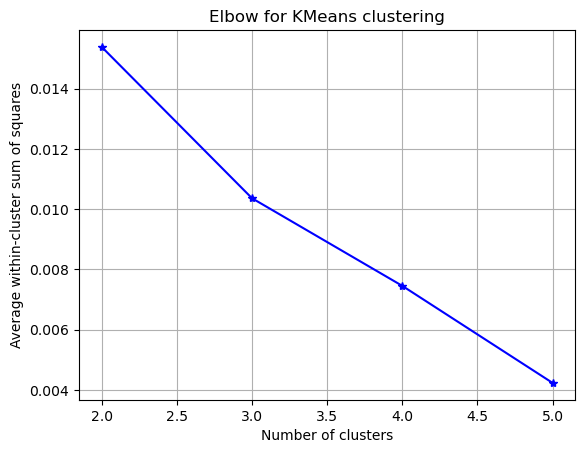

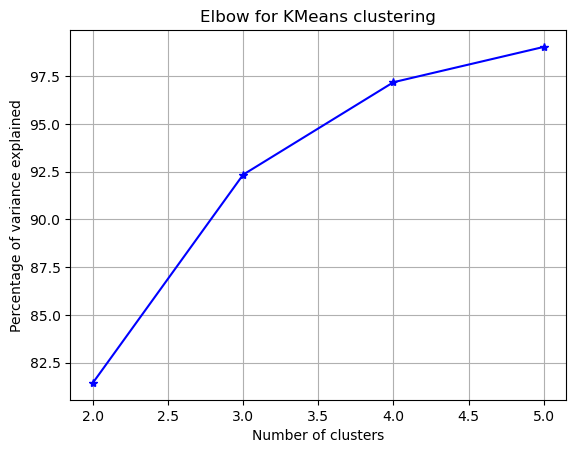

In [23]:
elbow(X, range(2,6))

In [24]:
# First, ensure it's in the correct shape for KMeans, which is a 2D array:
X = BeforeCovidPlane_data[['normalized_flight_count']]

n_clusters = 3 

# Initialize KMeans with the desired number of clusters
KM_Before = KMeans(n_clusters=n_clusters, random_state=0)

# Predict the cluster for each data point
BeforeCovidPlane_data['cluster'] = KM_Before.fit_predict(X)

# Now flight_data has an additional column 'cluster' which indicates the cluster each plane type belongs to
BeforeCovidPlane_data.sort_values(by='flight_count', inplace=True, ascending=False)
BeforeCovidPlane_data

,type,flight_count,size,normalized_flight_count,cluster
13,B73,2440608,narrow,3.312938e-01,2
3,A320,1374012,narrow,1.865116e-01,1
1,A31,687898,narrow,9.337689e-02,1
4,A321,587802,narrow,7.978962e-02,1
17,B77,331943,wide,4.505872e-02,0
5,A33,246047,mid,3.339900e-02,0
15,B75,187874,mid,2.550246e-02,0
24,CRJ9,178017,narrow,2.416444e-02,0
16,B76,140989,mid,1.913818e-02,0
41,E190,125645,narrow,1.705535e-02,0


In [25]:
BeforeCovidplanecluster_count = BeforeCovidPlane_data.groupby(['size','cluster']).size().reset_index(name='count')
BeforeCovidplanecluster_count

,size,cluster,count
0,mid,0,4
1,narrow,0,29
2,narrow,1,3
3,narrow,2,1
4,wide,0,6


In [26]:
# Group by cluster and type, then sum the flight counts
BeforeCovid_cluster_type_group = BeforeCovidPlane_data.groupby(['cluster', 'type']).agg({'flight_count': 'sum'})

# Reset index to turn the multi-index into columns
BeforeCovid_cluster_type_group.reset_index(inplace=True)

# Identify the row with the maximum flight count in each cluster
BeforeCovid_most_common_type = BeforeCovid_cluster_type_group.loc[BeforeCovid_cluster_type_group.groupby('cluster')['flight_count'].idxmax()]

# Display the result
BeforeCovid_most_common_type

,cluster,type,flight_count
13,0,B77,331943
40,1,A320,1374012
42,2,B73,2440608


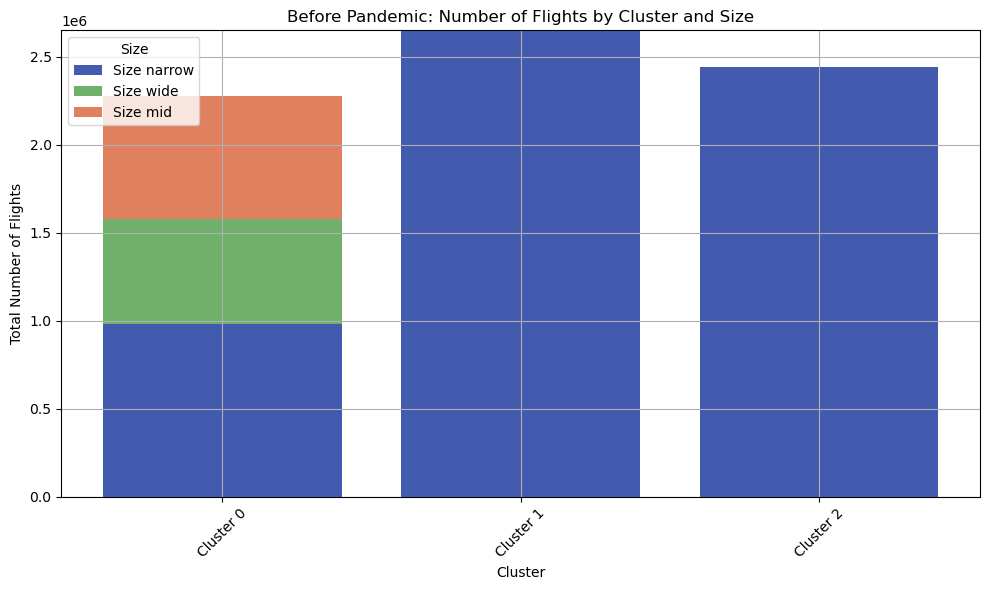

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your color map for the sizes
color_map = {
    'mid': '#E0805E',  # Orange-like color for mid
    'narrow': '#435BAE',  # Blue-like color for narrow
    'wide': '#6FB16B'  # Green-like color for wide
}

# Prepare the data
cluster_sizes = BeforeCovidPlane_data['size'].unique()
clusters = BeforeCovidPlane_data['cluster'].unique()

# Sort clusters for consistent plotting
clusters = sorted(clusters)

# Aggregate the data to avoid duplicates
aggregated_data = BeforeCovidPlane_data.groupby(['cluster', 'size']).agg({'flight_count':'sum'}).reset_index()

# Initialize the bottom for the stack
bottom = None

plt.figure(figsize=(10, 6))

# Loop over each size category
for size in cluster_sizes:
    subset = aggregated_data[aggregated_data['size'] == size]
    subset = subset.set_index('cluster')['flight_count'].reindex(clusters).fillna(0)
    plt.bar(clusters, subset, bottom=bottom, color=color_map[size], label=f'Size {size}')

    # Update bottom
    if bottom is None:
        bottom = subset
    else:
        bottom += subset

# Set labels and titles
plt.title('Before Pandemic: Number of Flights by Cluster and Size')
plt.xlabel('Cluster')
plt.ylabel('Total Number of Flights')
plt.xticks(ticks=clusters, labels=[f'Cluster {x}' for x in clusters], rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.tight_layout()
plt.show()

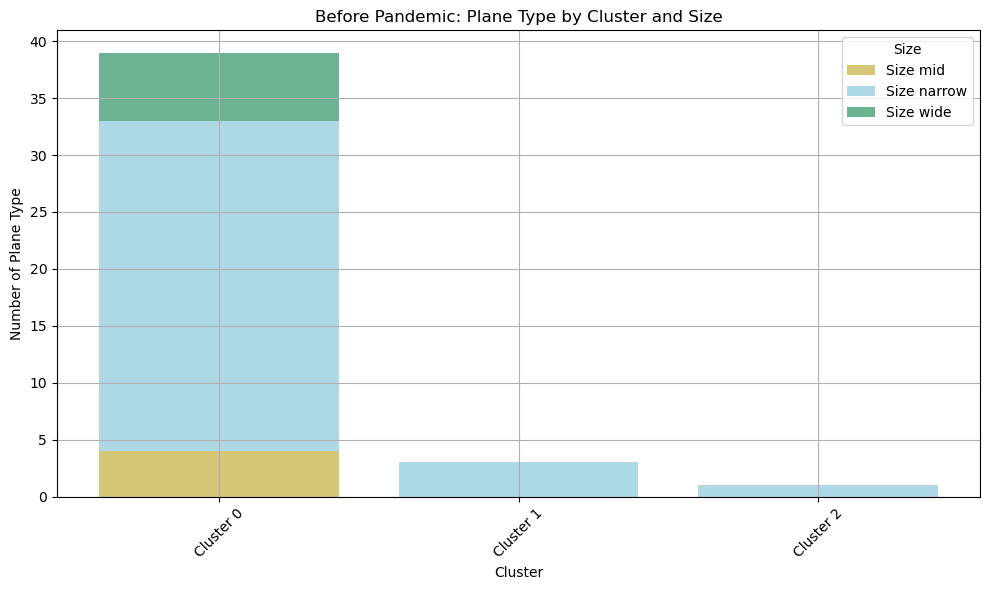

In [28]:
import matplotlib.pyplot as plt

# Define your color map for the sizes
color_map = {
    'mid': '#D6C677',  # Light Tan for mid
    'narrow': '#ADD8E6',  # Lighter blue for narrow
    'wide':  '#6BB392' # Muted Green for wide
}

# Prepare the data
cluster_sizes = BeforeCovidplanecluster_count['size'].unique()
clusters = BeforeCovidplanecluster_count['cluster'].unique()

# Sort clusters for consistent plotting
clusters = sorted(clusters)

# Initialize the bottom for the stack
bottom = None

plt.figure(figsize=(10, 6))

# Loop over each size category
for size in cluster_sizes:
    subset = BeforeCovidplanecluster_count[BeforeCovidplanecluster_count['size'] == size]
    subset = subset.set_index('cluster')['count'].reindex(clusters).fillna(0)
    plt.bar(clusters, subset, bottom=bottom, color=color_map[size], label=f'Size {size}')

    # Update bottom
    if bottom is None:
        bottom = subset
    else:
        bottom += subset

# Set labels and titles
plt.title('Before Pandemic: Plane Type by Cluster and Size')
plt.xlabel('Cluster')
plt.ylabel('Number of Plane Type')
plt.xticks(ticks=clusters, labels=[f'Cluster {x}' for x in clusters], rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Cluter for Flight Data During Covid

In [29]:
CovidPlane_data = CovidData.groupby(['type']).agg({'flight_count':'sum','size':'first'}).reset_index()
CovidPlane_data.head()

,type,flight_count,size
0,A30,55912,narrow
1,A31,355830,narrow
2,A320,641611,narrow
3,A321,285696,narrow
4,A33,110985,mid


In [30]:
#Calculate the total number of flights
Covid_total_flights = CovidPlane_data['flight_count'].sum()

# Normalize the flight counts by dividing by the total flights
CovidPlane_data['normalized_flight_count'] = CovidPlane_data['flight_count'] / Covid_total_flights
CovidPlane_data.head()

,type,flight_count,size,normalized_flight_count
0,A30,55912,narrow,0.012200
1,A31,355830,narrow,0.077642
2,A320,641611,narrow,0.139999
3,A321,285696,narrow,0.062338
4,A33,110985,mid,0.024217


In [31]:
#fit a new model and predict
Y = CovidPlane_data['normalized_flight_count'].values.reshape(-1, 1)
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = km.fit_predict(Y)
    #report average Silhouette score
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.8998159303993875
For n_clusters =3, the average silhouette_score is :0.7688935970269772
For n_clusters =4, the average silhouette_score is :0.6588143445145829
For n_clusters =5, the average silhouette_score is :0.6621066983894648
For n_clusters =6, the average silhouette_score is :0.649216136508428
For n_clusters =7, the average silhouette_score is :0.6419163998991542
For n_clusters =8, the average silhouette_score is :0.6240657937453051
For n_clusters =9, the average silhouette_score is :0.6320373722546313


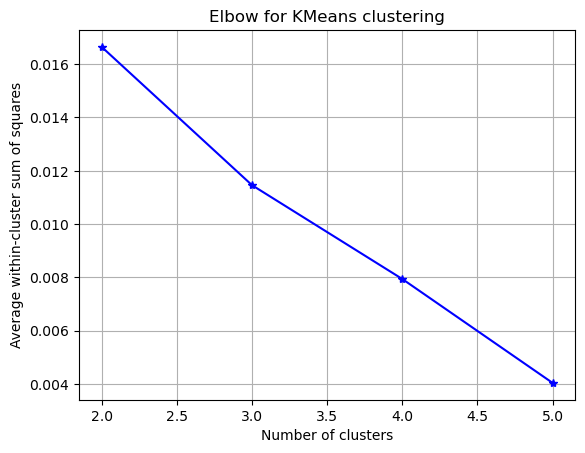

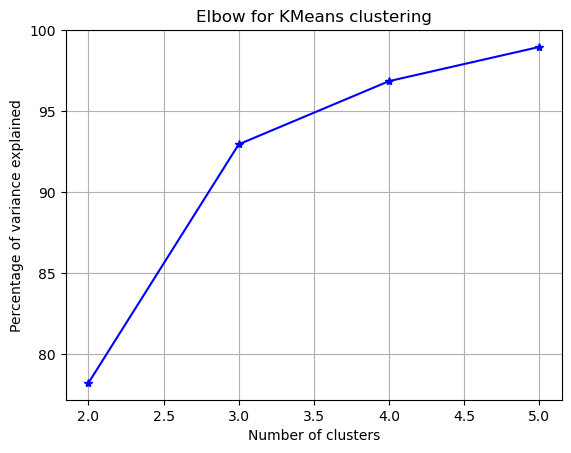

In [32]:
elbow(Y, range(2,6))

In [33]:
n_clusters = 3

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Predict the cluster for each data point
CovidPlane_data['cluster'] = kmeans.fit_predict(Y)

CovidPlane_data.sort_values(by='flight_count', inplace=True, ascending=False)
CovidPlane_data

,type,flight_count,size,normalized_flight_count,cluster
11,B73,1559583,narrow,3.402990e-01,1
2,A320,641611,narrow,1.399987e-01,2
1,A31,355830,narrow,7.764164e-02,2
3,A321,285696,narrow,6.233849e-02,2
15,B77,220557,wide,4.812525e-02,0
22,CRJ9,183722,narrow,4.008790e-02,0
13,B75,144472,mid,3.152360e-02,0
14,B76,131471,mid,2.868680e-02,0
4,A33,110985,mid,2.421678e-02,0
12,B74,106319,wide,2.319867e-02,0


In [34]:
CovidPlanecluster_count = CovidPlane_data.groupby(['size','cluster']).size().reset_index(name='count')
CovidPlanecluster_count

,size,cluster,count
0,mid,0,4
1,narrow,0,29
2,narrow,1,1
3,narrow,2,3
4,wide,0,5


In [35]:
# Group by cluster and type, then sum the flight counts
Covid_cluster_type_group = CovidPlane_data.groupby(['cluster', 'type']).agg({'flight_count': 'sum'})

# Reset index to turn the multi-index into columns
Covid_cluster_type_group.reset_index(inplace=True)

# Identify the row with the maximum flight count in each cluster
Covid_most_common_type = Covid_cluster_type_group.loc[Covid_cluster_type_group.groupby('cluster')['flight_count'].idxmax()]

# Display the result
Covid_most_common_type

,cluster,type,flight_count
11,0,B77,220557
38,1,B73,1559583
40,2,A320,641611


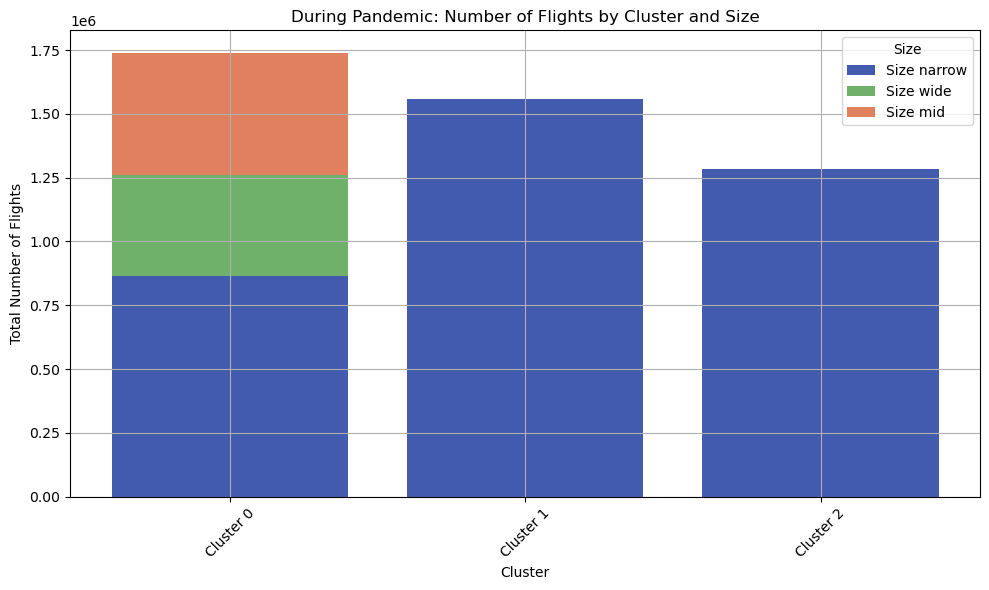

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your color map for the sizes
color_map = {
    'mid': '#E0805E',  # Orange-like color for mid
    'narrow': '#435BAE',  # Blue-like color for narrow
    'wide': '#6FB16B'  # Green-like color for wide
}

# Prepare the data
cluster_sizes = CovidPlane_data['size'].unique()
clusters = CovidPlane_data['cluster'].unique()

# Sort clusters for consistent plotting
clusters = sorted(clusters)

# Aggregate the data to avoid duplicates
aggregated_data = CovidPlane_data.groupby(['cluster', 'size']).agg({'flight_count':'sum'}).reset_index()

# Initialize the bottom for the stack
bottom = None

plt.figure(figsize=(10, 6))

# Loop over each size category
for size in cluster_sizes:
    subset = aggregated_data[aggregated_data['size'] == size]
    subset = subset.set_index('cluster')['flight_count'].reindex(clusters).fillna(0)
    plt.bar(clusters, subset, bottom=bottom, color=color_map[size], label=f'Size {size}')

    # Update bottom
    if bottom is None:
        bottom = subset
    else:
        bottom += subset

# Set labels and titles
plt.title('During Pandemic: Number of Flights by Cluster and Size')
plt.xlabel('Cluster')
plt.ylabel('Total Number of Flights')
plt.xticks(ticks=clusters, labels=[f'Cluster {x}' for x in clusters], rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.tight_layout()
plt.show()

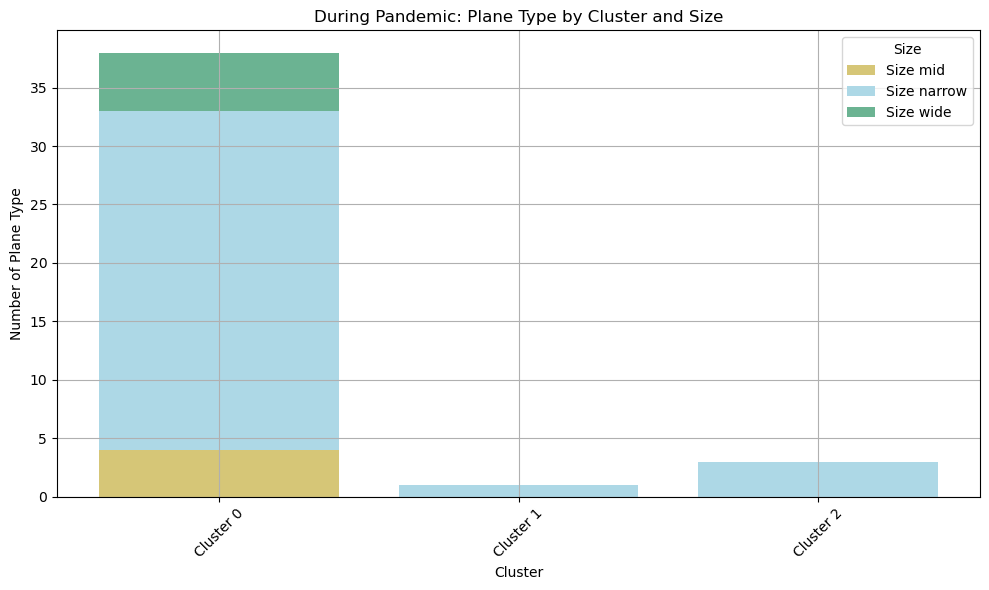

In [37]:
import matplotlib.pyplot as plt

# Define your color map for the sizes
color_map = {
    'mid': '#D6C677',  # Light Tan for mid
    'narrow': '#ADD8E6',  # Lighter blue for narrow
    'wide':  '#6BB392' # Muted Green for wide
}

# Prepare the data
cluster_sizes = CovidPlanecluster_count['size'].unique()
clusters = CovidPlanecluster_count['cluster'].unique()

# Sort clusters for consistent plotting
clusters = sorted(clusters)

# Initialize the bottom for the stack
bottom = None

plt.figure(figsize=(10, 6))

# Loop over each size category
for size in cluster_sizes:
    subset = CovidPlanecluster_count[CovidPlanecluster_count['size'] == size]
    subset = subset.set_index('cluster')['count'].reindex(clusters).fillna(0)
    plt.bar(clusters, subset, bottom=bottom, color=color_map[size], label=f'Size {size}')

    # Update bottom
    if bottom is None:
        bottom = subset
    else:
        bottom += subset

# Set labels and titles
plt.title('During Pandemic: Plane Type by Cluster and Size')
plt.xlabel('Cluster')
plt.ylabel('Number of Plane Type')
plt.xticks(ticks=clusters, labels=[f'Cluster {x}' for x in clusters], rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Cluter for Flight Data After Covid

In [38]:
AfterCovidPlane_data = AfterCovid.groupby(['type']).agg({'flight_count':'sum','size':'first'}).reset_index()
# get the averag annual flight since 'flight count' is the sum of two years.
AfterCovidPlane_data['annual_flight'] = AfterCovidPlane_data['flight_count']/2
#Calculate the total number of flights
AfterCovid_total_flights = AfterCovidPlane_data['annual_flight'].sum()

# Normalize the flight counts by dividing by the total flights
AfterCovidPlane_data['normalized_flight_count'] = AfterCovidPlane_data['annual_flight'] / AfterCovid_total_flights
AfterCovidPlane_data.head()
AfterCovidPlane_data.head()

,type,flight_count,size,annual_flight,normalized_flight_count
0,A30,116156,narrow,58078.0,0.009496
1,A31,901382,narrow,450691.0,0.073693
2,A32,150,narrow,75.0,0.000012
3,A320,1784200,narrow,892100.0,0.145869
4,A321,934229,narrow,467114.5,0.076379


In [39]:
Z = AfterCovidPlane_data['normalized_flight_count'].values.reshape(-1, 1)
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = km.fit_predict(Z)
    #report average Silhouette score
    silhouette_avg = silhouette_score(Z, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.9008476726467505
For n_clusters =3, the average silhouette_score is :0.8029452481716992
For n_clusters =4, the average silhouette_score is :0.7123893060694655
For n_clusters =5, the average silhouette_score is :0.7001078591015417
For n_clusters =6, the average silhouette_score is :0.6832887687724418
For n_clusters =7, the average silhouette_score is :0.7263968206689908
For n_clusters =8, the average silhouette_score is :0.7239520232359002
For n_clusters =9, the average silhouette_score is :0.6952638719041232


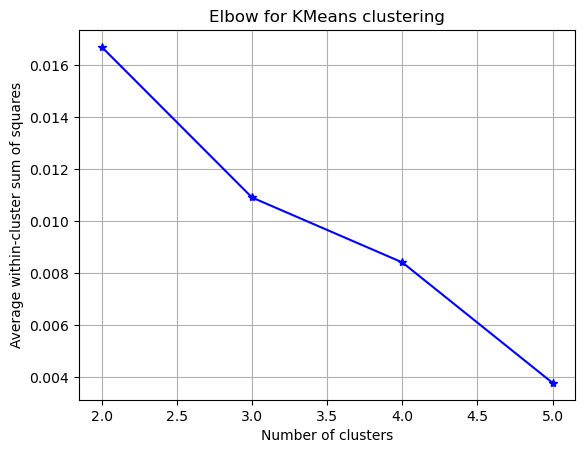

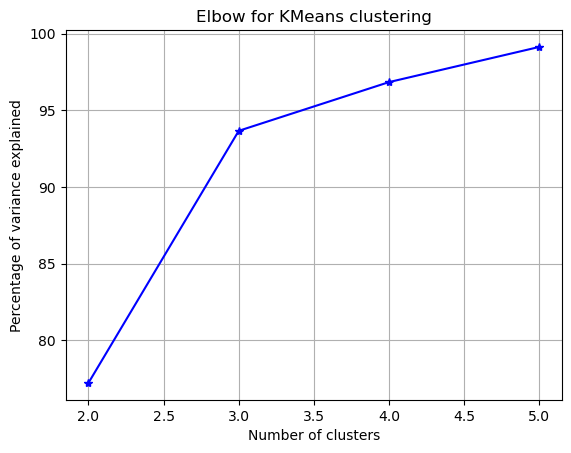

In [40]:
elbow(Z, range(2,6))

In [41]:
n_clusters = 3 

kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Predict the cluster for each data point
AfterCovidPlane_data['cluster'] = kmeans.fit_predict(Z)

# Now flight_data has an additional column 'cluster' which indicates the cluster each plane type belongs to
AfterCovidPlane_data.sort_values(by='flight_count', inplace=True, ascending=False)
AfterCovidPlane_data

,type,flight_count,size,annual_flight,normalized_flight_count,cluster
12,B73,4194800,narrow,2097400.0,3.429500e-01,1
3,A320,1784200,narrow,892100.0,1.458690e-01,0
4,A321,934229,narrow,467114.5,7.637881e-02,0
1,A31,901382,narrow,450691.0,7.369338e-02,0
23,CRJ9,526490,narrow,263245.0,4.304371e-02,2
16,B77,475461,wide,237730.5,3.887178e-02,2
14,B75,365391,mid,182695.5,2.987290e-02,2
15,B76,307365,mid,153682.5,2.512893e-02,2
41,E190,305175,narrow,152587.5,2.494988e-02,2
29,DH8D,266845,narrow,133422.5,2.181618e-02,2


In [46]:
# Group by cluster and type, then sum the flight counts
AfterCovid_cluster_type_group = AfterCovidPlane_data.groupby(['cluster', 'type']).agg({'annual_flight': 'sum'})

# Reset index to turn the multi-index into columns
AfterCovid_cluster_type_group.reset_index(inplace=True)

# Identify the row with the maximum flight count in each cluster
AfterCovid_most_common_type = AfterCovid_cluster_type_group.loc[AfterCovid_cluster_type_group.groupby('cluster')['annual_flight'].idxmax()]

# Display the result
AfterCovid_most_common_type

,cluster,type,annual_flight
1,0,A320,892100.0
3,1,B73,2097400.0
23,2,CRJ9,263245.0


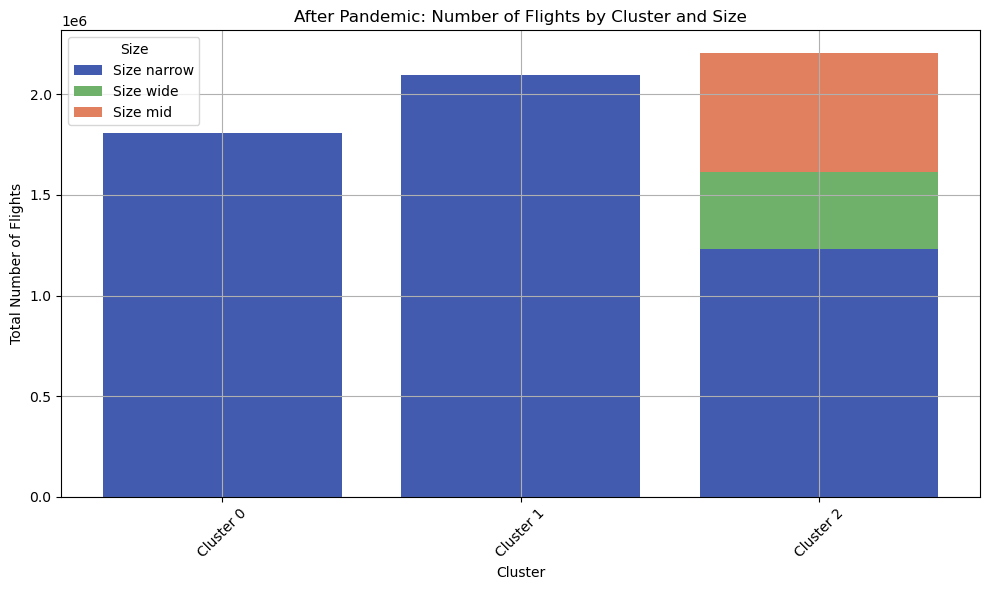

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your color map for the sizes
color_map = {
    'mid': '#E0805E',  # Orange-like color for mid
    'narrow': '#435BAE',  # Blue-like color for narrow
    'wide': '#6FB16B'  # Green-like color for wide
}

# Prepare the data
cluster_sizes = AfterCovidPlane_data['size'].unique()
clusters = AfterCovidPlane_data['cluster'].unique()

# Sort clusters for consistent plotting
clusters = sorted(clusters)

# Aggregate the data to avoid duplicates
aggregated_data = AfterCovidPlane_data.groupby(['cluster', 'size']).agg({'annual_flight':'sum'}).reset_index()

# Initialize the bottom for the stack
bottom = None

plt.figure(figsize=(10, 6))

# Loop over each size category
for size in cluster_sizes:
    subset = aggregated_data[aggregated_data['size'] == size]
    subset = subset.set_index('cluster')['annual_flight'].reindex(clusters).fillna(0)
    plt.bar(clusters, subset, bottom=bottom, color=color_map[size], label=f'Size {size}')

    # Update bottom
    if bottom is None:
        bottom = subset
    else:
        bottom += subset

# Set labels and titles
plt.title('After Pandemic: Number of Flights by Cluster and Size')
plt.xlabel('Cluster')
plt.ylabel('Total Number of Flights')
plt.xticks(ticks=clusters, labels=[f'Cluster {x}' for x in clusters], rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
AfterCovidPlanecluster_count = AfterCovidPlane_data.groupby(['size','cluster']).size().reset_index(name='count')
AfterCovidPlanecluster_count

,size,cluster,count
0,mid,2,4
1,narrow,0,3
2,narrow,1,1
3,narrow,2,30
4,wide,2,5


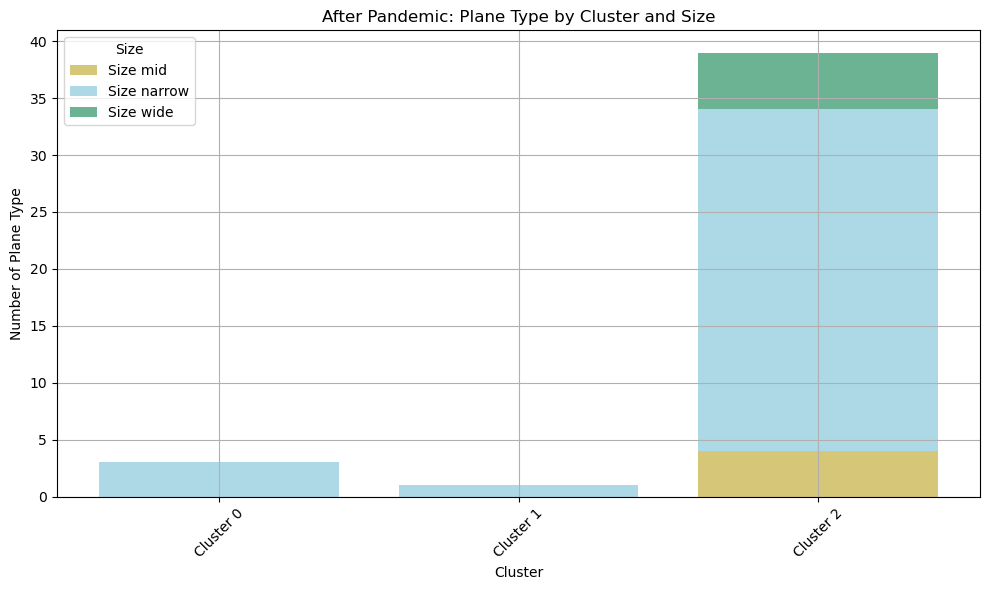

In [45]:
import matplotlib.pyplot as plt

# Define your color map for the sizes
color_map = {
    'mid': '#D6C677',  # Light Tan for mid
    'narrow': '#ADD8E6',  # Lighter blue for narrow
    'wide':  '#6BB392' # Muted Green for wide
}

# Prepare the data
cluster_sizes = AfterCovidPlanecluster_count['size'].unique()
clusters = AfterCovidPlanecluster_count['cluster'].unique()

# Sort clusters for consistent plotting
clusters = sorted(clusters)

# Initialize the bottom for the stack
bottom = None

plt.figure(figsize=(10, 6))

# Loop over each size category
for size in cluster_sizes:
    subset = AfterCovidPlanecluster_count[CovidPlanecluster_count['size'] == size]
    subset = subset.set_index('cluster')['count'].reindex(clusters).fillna(0)
    plt.bar(clusters, subset, bottom=bottom, color=color_map[size], label=f'Size {size}')

    # Update bottom
    if bottom is None:
        bottom = subset
    else:
        bottom += subset

# Set labels and titles
plt.title('After Pandemic: Plane Type by Cluster and Size')
plt.xlabel('Cluster')
plt.ylabel('Number of Plane Type')
plt.xticks(ticks=clusters, labels=[f'Cluster {x}' for x in clusters], rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.tight_layout()
plt.show()